In [102]:
# -*- coding: utf-8 -*-
"""
HW5 
@author: Sebastian Klemkosky
@abc123: lmo120

Please insert one code cell for each question

"""

'\nHW5 \n@author: Sebastian Klemkosky\n@abc123: lmo120\n\nPlease insert one code cell for each question\n\n'

% import modules needed

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy.random as rn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2


#Import hw5q1
q1 = pd.read_excel('/content/hw5q1.xlsx')

q1.shape


(1000, 4)

% Q1a

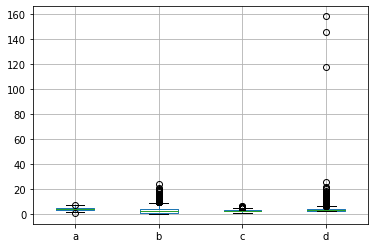

In [104]:
#a. (4pts) Show a boxplot of the data.
q1.boxplot()


% Q1b    

In [105]:
#b. (4pts) Use pandas function describe() to print out the summary statistics of the data
q1.describe()



,a,b,c,d
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.993356,2.960433,2.786134,4.158032
std,1.009219,3.131134,0.711737,7.951631
min,0.876039,0.000909,1.056609,2.000620
25%,3.271742,0.763997,2.274519,2.321567
50%,4.042064,1.983874,2.699545,2.919469
75%,4.705365,4.042860,3.202333,4.013069
max,6.870148,24.173974,6.032348,157.940206


% Q1c

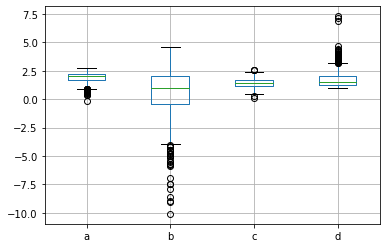

In [106]:
#c. (4pts) Apply log2 transformation (with applymap and np.log2) to the data and show the boxplot. 

q1_log = q1.applymap(np.log2)
q1_log.boxplot()


% Q1d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a4340390>,
      dtype=object)

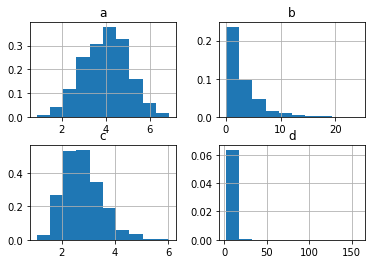

In [107]:
#d. (4pts) Use pandas function hist to show the histogram of each column of the data frame. (Use option
#density = True so it plots probability instead of counts.) 

q1.hist(density = True)



% Q1e

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a449f2d0>,
      dtype=object)

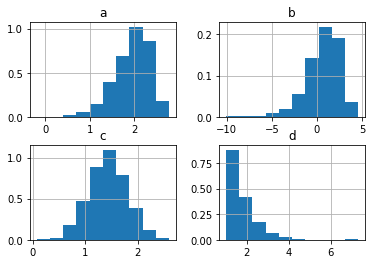

In [108]:
#(4pts) Use pandas function hist to show the histogram of the log transformed data frame. (Use option
#density = True so it plots probability instead of counts.) 

q1_log.hist(density = True)




% Q1f

Column A is normal distrubuted as it forms a bell curve

Column C is log normal distrubuted as forms a bell curve then descends.  Under the log tranformation of this column forms a bell curve. 

%Q2a

In [109]:
#a. (6 pts) Load data stored in brfss.csv format into a python DataFrame. The first line in the file is column
#header, and the first column in the file is row index. Drop the rows that have any NaN values, and drop
#the 'wtkg2' column. Change the sex column so that 1 (True) means male and 0 (False) means female.
#(Originally, sex == 2 means female and sex == 1 means male.) Rename the columns to age, weight,
#height, and male. Name the new DataFrame as brfss. Print out the shape (number of rows and columns)
#of brfss



brfss = pd.read_csv('/content/brfss.csv', index_col = 0)

#Drop the rows that have any NaN values, and drop the 'wtkg2' column.
brfss = brfss.drop(columns = ['wtkg2', 'wtkg2']).dropna()

#Change the sex column so that 1 (True) means male and 0 (False) means female.
#(Originally, sex == 2 means female and sex == 1 means male.)

brfss['sex'] = brfss['sex'].map({2:0, 1:1})


#Rename the columns to age, weight, height, and male.
brfss = brfss.rename(columns = {'weight2' : 'weight', 'htm3':'height', 'sex':'male'})


print(brfss.shape)

(385974, 5)


%	i. What is the max age for people in the dataset?

In [110]:
#i. What is the max age for people in the dataset?
print(brfss['age'].max())


99.0


% ii.	What is the mean weight for people in the dataset?

In [111]:
#ii. What is the mean weight for people in the dataset?
print(brfss['weight'].mean())

79.06146339580022


% iii.	What is the mean weight for female in the dataset? 

In [112]:
#iii. What is the mean weight for male in the dataset?
print(brfss['weight'][brfss['male'] == 1].mean())


89.07074617893183


% iv.	What is the median height for female in the dataset? 

In [113]:
#iv. What is the median height for female in the dataset?
print(brfss['height'][brfss['male'] == 0].median())


163.0


% v.	What is the mean weight for female younger than 20 years old?

In [114]:
#v. What is the mean weight for female < 20 years old?
print(brfss[(brfss['male'] == 0) & (brfss['age'] < 20)]  ['weight'].mean())
#get the females < 20 and get the mean of the height


64.66934327502156


% vi.	How many males are in the dataset?

In [115]:
#vi. How many males are in the dataset?
print(len(brfss[brfss['male'] == 1]))


150321


% vii.	How many individuals in the dataset has height > 190cm and weight < 50kg?

In [128]:
#vii. How many individuals in the dataset has height > 190cm and weight < 50kg?
print(len(brfss[(brfss['height'] > 190) & (brfss['weight'] < 50)]))




12


% viii.	What is the average height of females whose weight is between 59 and 61 kg?

In [117]:
#viii. What is the average height of females whose weight is > 59 and < 61 kg?
#This function returns a boolean vector containing True wherever the corresponding Series element is between the boundary values left and right. 
#NA values are treated as False.


print(brfss[(brfss['weight'].between(59, 61) & (brfss['male'] == 0))]['height'].mean())



161.5588215235627


% ix.	Print out row 2001 to row 2010 (inclusive, a total of ten rows) from the dataframe.

In [118]:
#ix. Print out row 2001 to row 2010 (inclusive, a total of ten rows) from the dataframe. (Just to be
#sure, our row count starts from row 0.)


print(brfss.iloc[2001: 2011, :])

       age      weight     wtyrago  height  male
2174  55.0   77.272727   77.272727   173.0     1
2175  54.0   86.363636   90.454545   175.0     1
2176  51.0   72.727273   75.000000   183.0     1
2177  22.0  122.727273  122.727273   163.0     0
2178  71.0   68.181818   75.000000   180.0     1
2179  82.0   72.727273   68.181818   163.0     0
2180  55.0  100.000000  100.000000   183.0     1
2181  53.0  127.272727  127.272727   185.0     1
2182  58.0   77.272727   75.000000   173.0     1
2183  58.0   77.272727   77.272727   180.0     0


% x.	Print out rows with rowID from 2001 to 2010 (including 2010, but maybe less than 10 rows due to NaNs being dropped out) from the dataframe.

In [119]:
#x. Print out rows with “row index” (note: dataframe index) from 2001 to 2010 (inclusive, but may
#have less than 10 rows due to NaNs being dropped out already) from the dataframe. (Note that
#the row indices of this dataframe are integers assigned when we loaded the data from the csv
#file; these indice have been kept for each record in the lifetime of the dataframe unless we
#change them explicitly.)


print(brfss.loc[2001: 2010, :])




       age      weight     wtyrago  height  male
2001  54.0   90.000000   90.000000   188.0     1
2002  29.0   79.545455   79.545455   175.0     0
2004  30.0   90.909091   90.909091   152.0     0
2005  37.0   59.090909   61.363636   165.0     0
2006  25.0   97.727273   86.363636   180.0     0
2007  43.0   62.727273   68.181818   165.0     0
2008  40.0  100.909091  116.818182   165.0     0
2009  51.0   70.454545   70.454545   157.0     0
2010  45.0   85.000000  136.363636   160.0     0


% Q3a

In [120]:
#(10 pts) From the brfss DataFrame created in Q2a, use the height column as Y, and weight column as X
#to perform a simple linear regression (See 6-regression.ppt slide #23, lr.fit). Print out the equation that is
#obtained by the linear regression in the form of “height = a + b * weight” (replace a and b with the
#values obtained from the linear regression, lr.intercept_ and lr.coef_.) (Note: you need to either make X
#a DataFrame or reshape X to be a n x 1 numpy array using reshape(-1, 1); see simpleRegression.ipynb.)

#From the brfss DataFrame created in Q2a, use the height column as Y, and weight column as X
#to perform a simple linear regression (See 6-regression.ppt slide #23, lr.fit). 




X = brfss[['weight']].values
Y = brfss[['height']].values

lr = linear_model.LinearRegression()
lr.fit(X,Y)



#Print out the equation that is
#obtained by the linear regression in the form of “height = a + b * weight” (replace a and b with the
#values obtained from the linear regression, lr.intercept_ and lr.coef_.) 

a = lr.coef_[0]
b = lr.intercept_
print('height =', a[0], '+', b[0], '* weight')


height = 0.2720578213715107 + 147.50415183397914 * weight


% Q3b

In [121]:
#b. (4 pts) Use the linear regression object that you obtained in 3a to predict the height of an individual
#whose weight is 60kg (with lr.predict). Print out the predicted height. (As in 3a, make the value 60 a
#dataframe or a 1x1 numpy 2d array.)
w = 60
h = lr.predict([[w]])[0] #when running this one sometimes an error occurs, I think it's because of Q3e in which we have 2 inputs in the predict function, run this one before Q3e
print('Predicted height for someone whose weight is 60kg:', h[0])



Predicted height for someone whose weight is 60kg: 163.82762111626977


% Q3c

In [122]:
#(6 pts) Compute the MSE and R-square of the simple linear regression. (Slide #23, Imported as r2 and
#mse.)


pred = lr.predict(X)
MSE = mse(Y, pred)

R2 = r2(Y, pred)

print('MSE:', MSE)
print('R-sqaure:', R2 )



MSE: 79.74278940442825
R-sqaure: 0.26115058374722433


% Q3d

In [123]:
#d. (10 pts) From the brfss DataFrame above, use the height column as Y, and two columns, weight and
#male, as X, to perform a multiple linear regression (slides #34). Print out the equation that is obtained
#by the linear regression in the form of “height = a + b * weight + c * male” (replace a, b and c with the
#values in lr.intercept_ and lr.coef_.) (FYI: compare the a, b, c values from the a, b values from Q3a.)


#From the brfss DataFrame above, use the height column as Y, and two columns, weight and
#isMale, as X, to perform a multiple linear regression (slides #34)

X = brfss[['weight', 'male']].values
Y = brfss[['height']].values

lr.fit(X, Y)

#print(lr.coef_)
#print(lr.intercept_)

#Print out the equation that is obtained
#by the linear regression in the form of “height = a + b * weight + c * male” (replace a, b and c with the
#values in lr.intercept_ and lr.coef_.) (FYI: compare the a, b, c values from the a, b values from Q3a.)

a = lr.coef_[0][0]
b = lr.coef_[0][1]
c = lr.intercept_[0]

print('height =', a, '+', b, '* weight +', c, '* male')



height = 0.14366705231478633 + 12.542187627044626 * weight + 152.77024763297374 * male


% Q3e

In [124]:
#(3 pts) Use the linear regression object that you obtained in 3d to predict the height of a male whose
#weight is 60kg. Print out the predicted height

m = 1
w = 60
h = lr.predict([[w, m]])[0]
print('Predicted height for males whose weight is 60 kg:', h[0])


Predicted height for males whose weight is 60 kg: 173.93245839890554


% Q3f

In [125]:
#(3 pts) Use the linear regression object that you obtained in 3d to predict the height of a female whose
#weight is 60kg. Print out the predicted height. (Just FYI, what is the difference between this predicted 

m = 0
w = 60
h = lr.predict([[w, m]])[0]
print('Predicted height for females whose weight is 60 kg:', h[0])

Predicted height for females whose weight is 60 kg: 161.3902707718609


% Q3g

In [126]:
#g. (4 pts) Compute the MSE and R-square of the multiple linear regression. (FYI: how does these two
#compare with the values from Q3c?)


pred = lr.predict(X)
MSE = mse(Y, pred)

R2 = r2(Y, pred)

print('MSE:', MSE)
print('R-sqaure:', R2 )



MSE: 48.615635342162335
R-sqaure: 0.5495563415628426
